0.5666666666666667


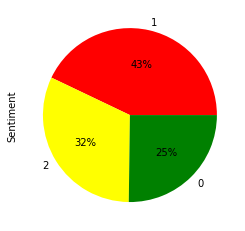

In [118]:
import numpy as np 
import pandas as pd 
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from dataScript import getDataset
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import accuracy_score
import random
import seaborn as sns

data = getDataset()
data = data.sample(frac=1).reset_index(drop=True)
data.head()
data.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

features = data.iloc[:,0].values
labels = data.iloc[:,1].values

f = open("stop_words.txt", "r", encoding='utf8')
stop = []
for x in f:
  stop.append(x.replace('\n',''))
f.close()
processed_features = []
ss = []

for i in range(0, len(stop)):

    s = str(stop[i])
    s = s.lower()
    s= re.sub(r'ü', 'u', s)
    s= re.sub(r'ö', 'o', s)
    s= re.sub(r'ı', 'i', s)
    s= re.sub(r'ğ', 'g', s)
    s= re.sub(r'ç', 'c', s)
    s= re.sub(r'ş', 's', s)
    ss.append(s)

processed_features = []

from snowballstemmer import TurkishStemmer
turkStem=TurkishStemmer()
tt = TweetTokenizer()
for sentence in range(0, len(features)):  
    processed_feature = re.sub(r'\s\'\s', '\'', str(features[sentence]))
    processed_feature= re.sub(r'[.!?,\'\"\[\]]', '', processed_feature)
    processed_feature= re.sub(r'\d', '', processed_feature)

    processed_feature = processed_feature.lower()

    stemmed_words = []
    for w in tt.tokenize(processed_feature):
      w = turkStem.stemWord(w)
      stemmed_words.append(w)
    processed_feature = ' '.join([str(elem) for elem in stemmed_words]) 

    processed_feature = stemmer.stem(processed_feature)
    processed_feature= re.sub(r'ü', 'u', processed_feature)
    processed_feature= re.sub(r'ö', 'o', processed_feature)
    processed_feature= re.sub(r'ı', 'i', processed_feature)
    processed_feature= re.sub(r'ğ', 'g', processed_feature)
    processed_feature= re.sub(r'ş', 's', processed_feature)
    processed_feature= re.sub(r'ç', 'c', processed_feature)
    # Replaces #hashtag with hashtag
    processed_feature = re.sub(r'#(\S+)', r' \1 ', processed_feature)

    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    processed_feature = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', processed_feature)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    processed_feature = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', processed_feature)
    # Love -- <3, :*
    processed_feature = re.sub(r'(<3|:\*)', ' EMO_POS ', processed_feature)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    processed_feature = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', processed_feature)
    # Sad -- :-(, : (, :(, ):, )-:
    processed_feature = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', processed_feature)
    # Cry -- :,(, :'(, :"(
    processed_feature = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', processed_feature)
    

    # Convert more than 2 letter repetitions to 2 letter
    processed_feature = re.sub(r'(.)\1+', r'\1\1', processed_feature)
    
    processed_features.append(processed_feature)


vectorizer = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.4, stop_words=stop)
processed_features = vectorizer.fit_transform(processed_features)

#print(vectorizer.get_feature_names())

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=1)


model = svm.SVC(kernel='rbf') 
model.fit(X_train, y_train) 
predicted_sentiment = model.predict(X_test)

print(accuracy_score(y_test, predicted_sentiment))